# Pymaceuticals Inc.
---
The percentage of male and female mice are nearly equal at approximately 50%.
The Capomulin and Ramicane had the most mice tested among the 10 drug regimens tested. 
Mice weight and tumor volume has a high, positive degree of correlation. 




In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_complete = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
# Display the data table for preview
mouse_study_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice.
number_mice = mouse_study_complete["Mouse ID"].nunique()
number_mice 

249

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRows = mouse_study_complete[mouse_study_complete.duplicated(['Mouse ID', 'Timepoint'])]
duplicateRows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
# Optional: Get all the data for the duplicate mouse ID. 


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_complete_df = mouse_study_complete.drop_duplicates(subset=['Mouse ID'])
mouse_study_complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [11]:
# Checking the number of mice in the clean DataFrame.
mouse_count = mouse_study_complete_df["Mouse ID"].count()
mouse_count

249

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical method of each drug regimen for tumor volume

tumor_vol = mouse_study_complete.groupby('Drug Regimen').sum()['Tumor Volume (mm3)']
avg = mouse_study_complete.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = mouse_study_complete.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
var = mouse_study_complete.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
sd = mouse_study_complete.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
se = mouse_study_complete.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# Assemble data in a summary dataframe

summary_data = {"Total Tumor Volume": round((tumor_vol),2),
                "Mean Tumor Volume": round((avg),2),
                "Median Tumor Volume": round((median),2),
                "Tumor Volume Variance": round((var),2),
                "Tumor Volume Std. Dev.": round((sd),2),
                "Tumor Volume Std.Err.": round((se),2)
               }

summary_data_df = pd.DataFrame(summary_data)

summary_data_df





,Total Tumor Volume,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,,
Capomulin,9355.42,40.68,41.56,24.95,4.99,0.33
Ceftamin,9361.23,52.59,51.78,39.29,6.27,0.47
Infubinol,9413.49,52.88,51.82,43.13,6.57,0.49
Ketapril,10384.30,55.24,53.70,68.55,8.28,0.60
Naftisol,10105.67,54.33,52.51,66.17,8.13,0.60
Placebo,9780.08,54.03,52.29,61.17,7.82,0.58
Propriva,8423.93,52.32,50.85,42.35,6.51,0.51
Ramicane,9169.42,40.22,40.67,23.49,4.85,0.32
Stelasyn,9816.20,54.23,52.43,59.45,7.71,0.57


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_df = mouse_study_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([np.mean, np.median, np.var, np.std, st.sem])
summary_df



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

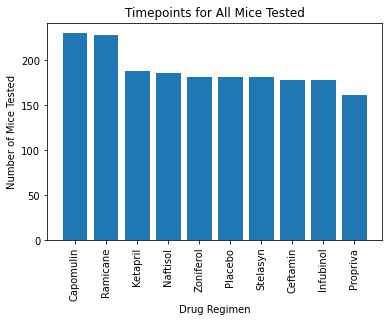

In [14]:
# Using pyplot, generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen 

drug_regiment = mouse_study_complete['Drug Regimen'].value_counts()
drug_regiment

x_axis = drug_regiment.index.values
y_axis = drug_regiment.values

plt.bar(x_axis, y_axis)
plt.gca().update(dict(title= 'Timepoints for All Mice Tested', xlabel='Drug Regimen', ylabel='Number of Mice Tested'))
plt.xticks(rotation='vertical')


plt.show()




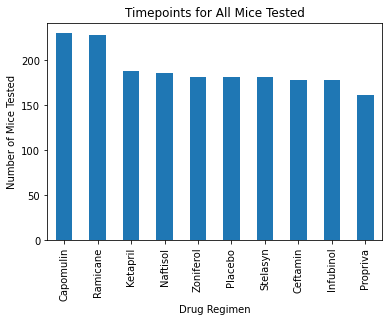

In [15]:
# Using Pandas, generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen.

drug_regiment.plot.bar(x=x_axis, y=y_axis)
plt.gca().update(dict(title= 'Timepoints for All Mice Tested', xlabel='Drug Regimen', ylabel='Number of Mice Tested'))
plt.show()


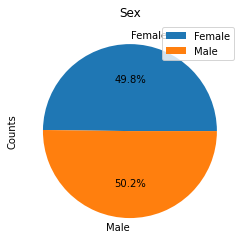

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = mouse_study_complete_df['Sex'].value_counts()
sex = mice_sex.index.values
sex_counts = mice_sex.values
mice_sex_df = pd.DataFrame({'Sex': (sex),'Counts': (sex_counts)})

#mice_sex_df.head()
mice_sex_df.groupby(['Sex']).sum().plot(kind='pie', y='Counts', autopct='%1.1f%%', title="Sex")



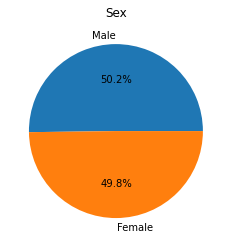

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_sex = mouse_study_complete_df['Sex'].value_counts()


sex = mice_sex.index.values
sex_counts = mice_sex.values

#plt.axis("equal")
#plt.title = "Sex"

plt.pie(sex_counts,labels=sex, autopct='%1.1f%%')
plt.gca().update(dict(title= 'Sex'))
plt
plt.show()


## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#four_regimes = mouse_study_complete[mouse_study_complete["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

Capomulin_df = mouse_study_complete.loc[mouse_study_complete["Drug Regimen"] == "Capomulin",:]
Ramicane_df = mouse_study_complete.loc[mouse_study_complete["Drug Regimen"] == "Ramicane", :]
Infubinol_df = mouse_study_complete.loc[mouse_study_complete["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = mouse_study_complete.loc[mouse_study_complete["Drug Regimen"] == "Ceftamin", :]

# Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, mouse_study_complete, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

# Ramicane
Ramicane__last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane__vol = pd.DataFrame(Ramicane__last)
Ramicane__merge = pd.merge(Ramicane__vol, mouse_study_complete, on=("Mouse ID","Timepoint"),how="left")
Ramicane__merge.head()

# Infubinol
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, mouse_study_complete, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

# Ceftamin
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, mouse_study_complete, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

# Capomulin Stats
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

Cap_quartiles =Capomulin_tumors.quantile([.25,.5,.75])
Cap_lowerq = Cap_quartiles[0.25]
Cap_upperq = Cap_quartiles[0.75]
Cap_IQR = Cap_upperq- Cap_lowerq
Cap_lower_bound = Cap_lowerq - (1.5*Cap_IQR)
Cap_upper_bound = Cap_upperq + (1.5*Cap_IQR)

# Ramicane Stats
Ramicane_tumors = Ramicane__merge["Tumor Volume (mm3)"]

Ram_quartiles =Ramicane_tumors.quantile([.25,.5,.75])
Ram_lowerq = Ram_quartiles[0.25]
Ram_upperq = Ram_quartiles[0.75]
Ram_IQR = Ram_upperq- Ram_lowerq
Ram_lower_bound = Ram_lowerq - (1.5*Ram_IQR)
Ram_upper_bound = Ram_upperq + (1.5*Ram_IQR)

# Infubinol Stats
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

Inf_quartiles =Infubinol_tumors.quantile([.25,.5,.75])
Inf_lowerq = Inf_quartiles[0.25]
Inf_upperq = Inf_quartiles[0.75]
Inf_IQR = Inf_upperq - Inf_lowerq
Inf_lower_bound = Inf_lowerq - (1.5*Inf_IQR)
Inf_upper_bound = Inf_upperq + (1.5*Inf_IQR)

# Ceftamin Stats
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

Cef_quartiles =Ceftamin_tumors.quantile([.25,.5,.75])
Cef_lowerq = Cef_quartiles[0.25]
Cef_upperq = Cef_quartiles[0.75]
Cef_IQR = Cef_upperq- Cef_lowerq
Cef_lower_bound = Cef_lowerq - (1.5*Cef_IQR)
Cef_upper_bound = Cef_upperq + (1.5*Cef_IQR)

print(f' The IQR for Capomulin is {Cap_IQR}')
print(f' The IQR for Ramicane is {Ram_IQR}')
print(f' The IQR for Infubinol is {Inf_IQR}')
print(f' The IQR for Ceftamin is {Cef_IQR}')


 The IQR for Capomulin is 7.781863460000004
 The IQR for Ramicane is 9.098536719999998
 The IQR for Infubinol is 11.477135160000003
 The IQR for Ceftamin is 15.577752179999997


In [39]:
# Put treatments into a list for for loop (and later for plot labels)

# Capomulin for loop outlier list capture
Cap_outliers = []

for x in Capomulin_tumors:
    if x < Cap_lower_bound or x > Cap_upper_bound: 
        Cap_outliers.append(x)
Cap_outliers

# Ramicane for loop outlier list capture

Ram_outliers = []

for x in Ramicane_tumors:
    if x < Ram_lower_bound or x > Ram_upper_bound: 
        Ram_outliers.append(x)
Ram_outliers

# Infubinol for loop list capture
Inf_outliers = []

for x in Infubinol_tumors:
    if x < Inf_lower_bound or x > Inf_upper_bound: 
        Inf_outliers.append(x)
Inf_outliers

# Ceftamin for loop list capture
Cef_outliers = []

for x in Ceftamin_tumors:
    if x < Cef_lower_bound or x > Cef_upper_bound: 
        Cef_outliers.append(x)
Cef_outliers

print(f'The outliers for Capomulin is {Cap_outliers}')
print(f'The outliers for Ramicane is {Ram_outliers}')
print(f'The outliers for Infubinol is {Inf_outliers}')
print(f'The outliers for Ceftamin is {Cef_outliers}')


The outliers for Capomulin is []
The outliers for Ramicane is []
The outliers for Infubinol is [36.321345799999996]
The outliers for Ceftamin is []


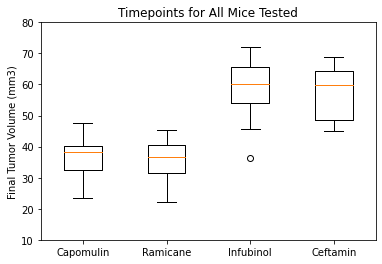

In [260]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
updated_df = top_regimes_df.reset_index()
tumor_groups = updated_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_groups_df = pd.DataFrame(tumor_groups)
tumor_groups_df = tumor_groups_df.reindex(named_regimes)
tumor_volumes = [volume for volume in tumor_groups_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_volumes, labels=named_regimes)
plt.ylim(10,80)
plt.gca().update(dict(title= 'Timepoints for All Mice Tested', ylabel='Final Tumor Volume (mm3)'))
plt.show()


## Line and Scatter Plots

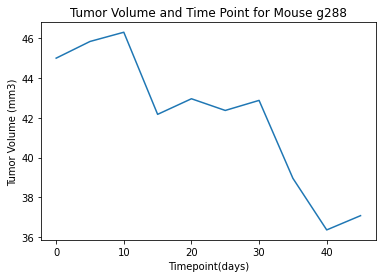

In [261]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
time_vol = mouse_study_complete[mouse_study_complete["Mouse ID"].isin(["g288"])]
time_vol

time_vol_next = time_vol[["Mouse ID","Timepoint", "Tumor Volume (mm3)"]]
time_vol_next

line_df = time_vol_next.reset_index()
line_df

line_df_update = line_df[["Timepoint","Tumor Volume (mm3)"]]
line_df_update

lines = pd.DataFrame(line_df_update)

x= lines['Timepoint']
y= lines['Tumor Volume (mm3)']


plt.plot(x, y)
plt.gca().update(dict(title= 'Tumor Volume and Time Point for Mouse g288', xlabel='Timepoint(days)', ylabel='Tumor Volume (mm3)'))

plt.show()

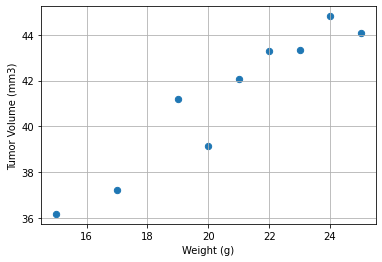

In [313]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_scatter = mouse_study_complete[mouse_study_complete["Drug Regimen"].isin(["Capomulin"])]

capo_vol_wt = capomulin_scatter[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]] 

capo_vol_wt_plot = capo_vol_wt.reset_index()

capo_sorted = capo_vol_wt_plot.sort_values(["Weight (g)"], ascending=True)

capo_grouped_wt = capo_sorted.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

capo_grouped_plot = pd.DataFrame(capo_grouped_wt).reset_index()

capo_scatter = capo_grouped_plot.plot(kind='scatter', x="Weight (g)", y="Tumor Volume (mm3)", grid=True,s=40)




## Correlation and Regression

[Text(0.5, 1.0, 'The correlation between mouse weight and average tumor is 0.90'),
 Text(0.5, 0, 'Timepoint(days)'),
 Text(0, 0.5, 'Tumor Volume (mm3)')]

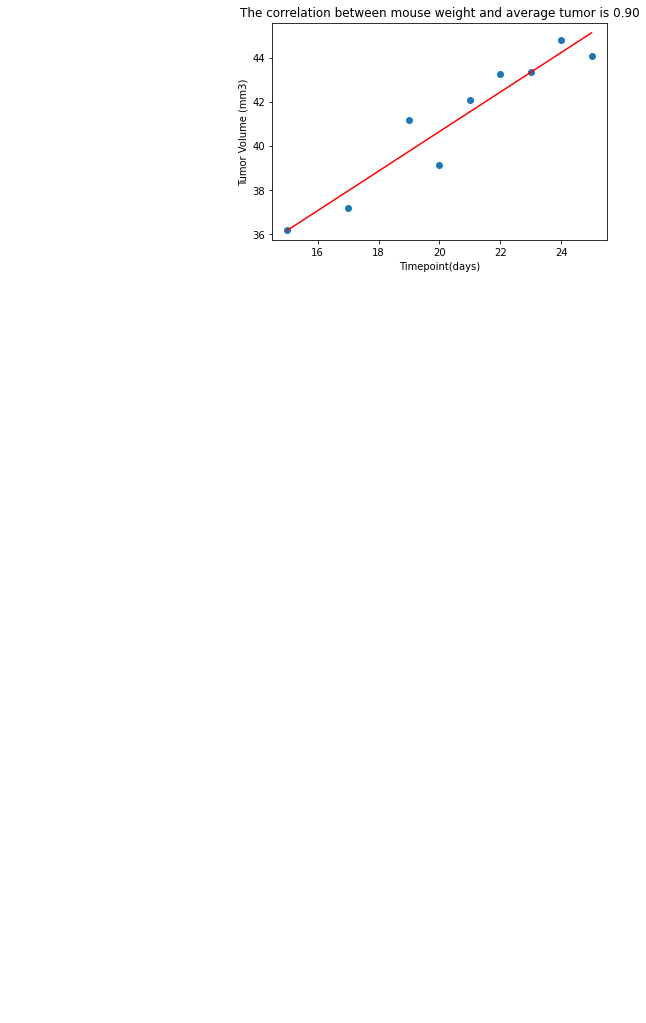

In [367]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capo_grouped_plot["Weight (g)"]
y_values = capo_grouped_plot["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=20,color="red")

plt.gca().update(dict(title=f'The correlation between mouse weight and average tumor is {rvalue**2:.2f}', xlabel='Timepoint(days)', ylabel='Tumor Volume (mm3)'))
